In [9]:
# imports
import os
import torch
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from rdkit import Chem
from explain_utils import visualize_features as vis



feature_labels = \
["Heavy neighb.",
"Hydrogen neighb.",
"Explicit valence",
"Aromaticity",
"In ring",
"Carbonyl C",
"\u03b1-C*", #α
"Methyl C",
"Amine N*",
"Carbonyl O",
"Methylene C*",
"Arg guanidinium C",
"Arg guanidinium \u03b5-NH", #ε
"Arg guanidinium NH\u2082",
"Asn/Gln N",
"Asp/Glu C",
"Cys S",
"sp\u00b2 CH",
"sp\u00b2 C",
"His imidazole N",
"His/Trp NH",
"Lys ammonium N",
"Met S",
"Pro \u03b1-C", #α
"Pro C",
"Pro backbone N",
"Hydroxyl O"]

color = (0x89, 0xd5, 0x48)
cmap = LinearSegmentedColormap.from_list("custom_cmap", [[1.]*3, [x/256 for x in color]], N=256)

# def data load functions
def load_feat_masks(folder):
    df = pd.read_csv(os.path.join(folder, "feat_masks.csv"), index_col=0)
    feat_masks = torch.tensor(df["feat_masks"].values).unsqueeze(1)
    feat_labels = list(df.index)
    return feat_masks, feat_labels

def load_node_masks(folder):
    df_node = pd.read_csv(os.path.join(folder, "node_masks.csv"), index_col=0)
    node_masks = torch.tensor(df_node["node_masks"].values)
    # node_labels = list(df_node["atoms"])
    # node_labels = [str(x)+" "+node_labels[x] for x in range(len(node_labels))]
    df_edge = pd.read_csv(os.path.join(folder, "node_edge_masks_aggr.csv"), index_col=0)
    edge_label = [eval(x) for x in df_edge.index]
    edge_masks = torch.tensor(df_edge["node_edge_masks_aggr"].values)
    aggr_edge_dict = {x:y for (x, y) in zip(edge_label, edge_masks)}
    df_info = pd.read_csv(os.path.join(folder, "info.csv"), index_col=0, header=None)
    smiles = df_info.loc["SMILES"].values[0]
    return node_masks, aggr_edge_dict, smiles #, node_labels

def load_indiv_masks(folder):
    df = pd.read_csv(os.path.join(folder, "indiv_masks.csv"), index_col=0)
    indiv_masks = torch.tensor(df.iloc[:,1:].values)
    return indiv_masks

def generate_atom_labels(mol2_file):
    mol = Chem.MolFromMol2File(mol2_file)
    atom_labels = [str(atom.GetIdx())+" "+atom.GetSymbol() for atom in mol.GetAtoms()]
    return atom_labels

def show_all(folder, mol2_file):
    node_masks, aggr_edge_dict, _ = load_node_masks(folder)
    feat_masks, _ = load_feat_masks(folder)
    indiv_masks = load_indiv_masks(folder)
    atom_labels = generate_atom_labels(mol2_file)

    # atoms and bonds
    im = vis.plot_highlight_mol_with_calc_colors(mol2_file, node_masks, aggr_edge_dict, color=color)
    display(im)
    # individual features
    vis.plot_indiv(indiv_masks, atom_labels, feature_labels, cmap=cmap, dpi=300)
    plt.show()
    plt.close()
    # features
    vis.plot_features(feat_masks, feature_labels, dpi=300, cmap=cmap)
    plt.show()
    plt.close()

def save_all(pdb_id, folder, mol2_file, save_folder):
    node_masks, aggr_edge_dict, _ = load_node_masks(folder)
    feat_masks, _ = load_feat_masks(folder)
    indiv_masks = load_indiv_masks(folder)
    atom_labels = generate_atom_labels(mol2_file)

    # atoms and bonds
    im = vis.plot_highlight_mol_with_calc_colors(mol2_file, node_masks, aggr_edge_dict, color=color)
    im.save(save_folder+pdb_id+"_"+"atom.png")
    # individual features
    vis.plot_indiv(indiv_masks, atom_labels, feature_labels, cmap=cmap, dpi=300)
    plt.savefig(save_folder+pdb_id+"_"+"indiv.png", bbox_inches="tight")
    plt.close()
    # features
    vis.plot_features(feat_masks, feature_labels, dpi=300, cmap=cmap)
    plt.savefig(save_folder+pdb_id+"_"+"feat.png", bbox_inches="tight")
    plt.close()

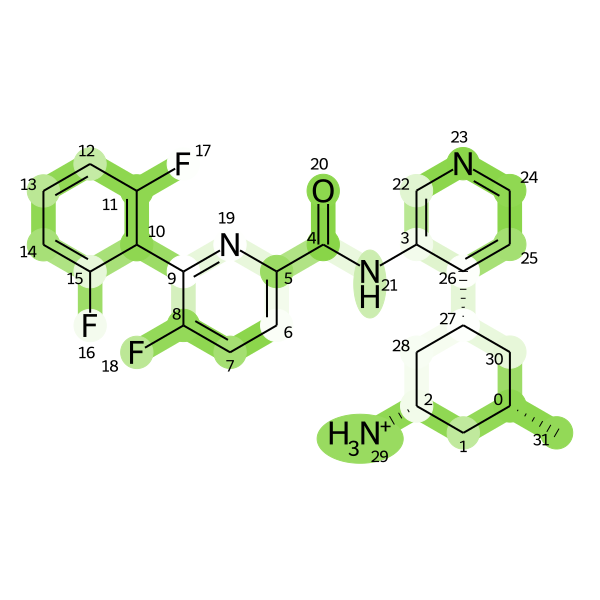

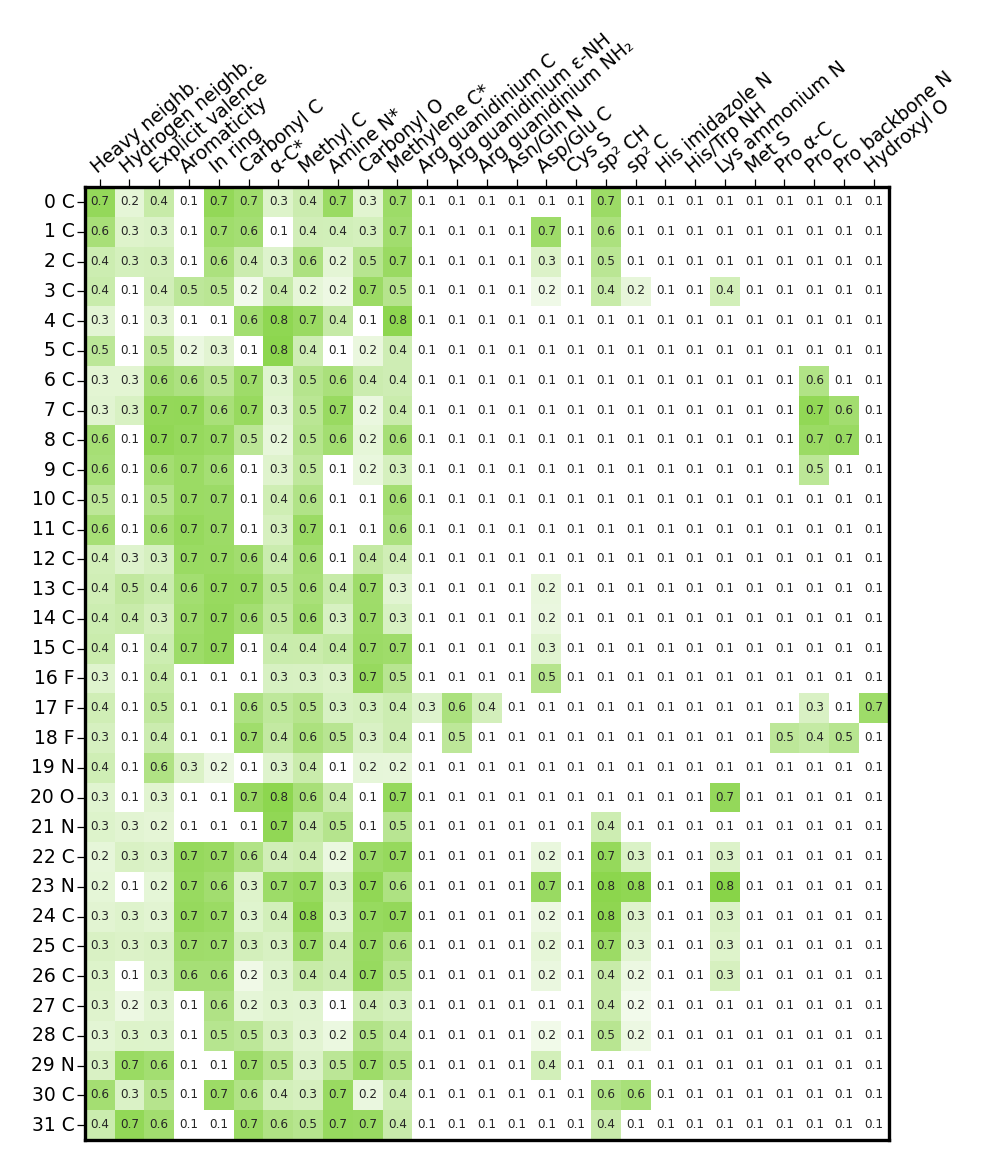

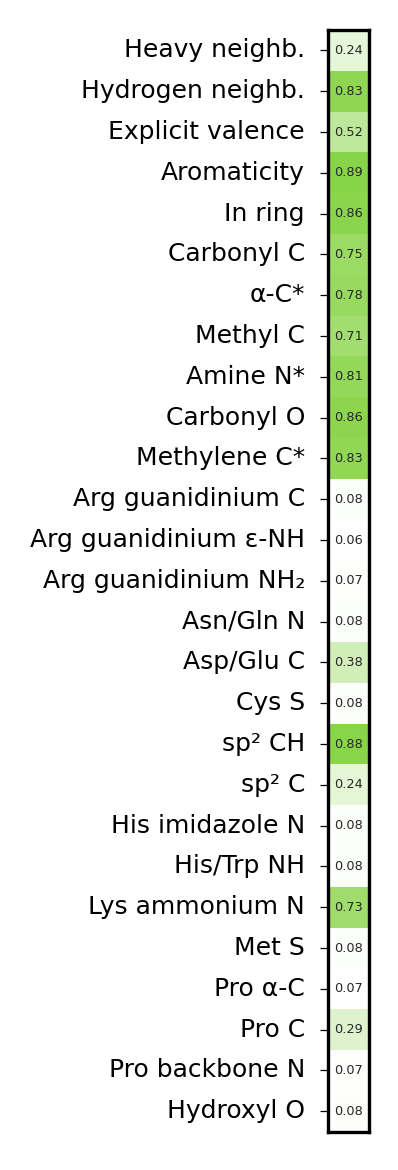

In [4]:
pdb_id="5dwr"
show_all(f"{pdb_id}_100_explanations", f"/nfs/home/s_homb04/Projektmodul/Graph_MLPNet_All/data/PDBBind/refined2016_2020_combined_for_ML_noligexpo/{pdb_id}/{pdb_id}_ligand.mol2")

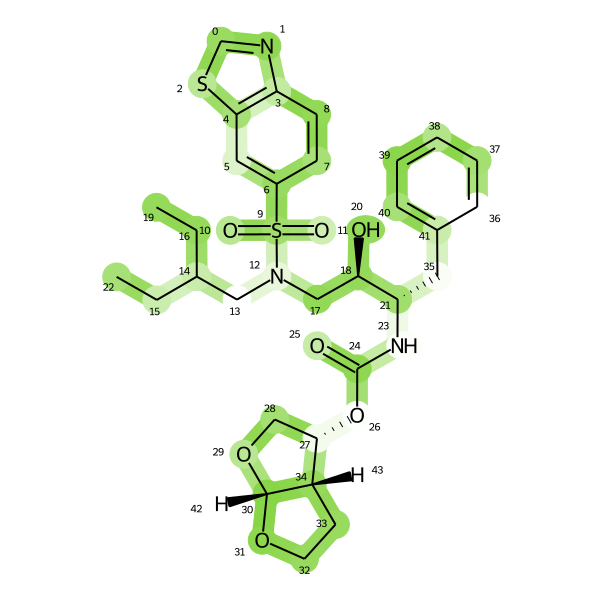

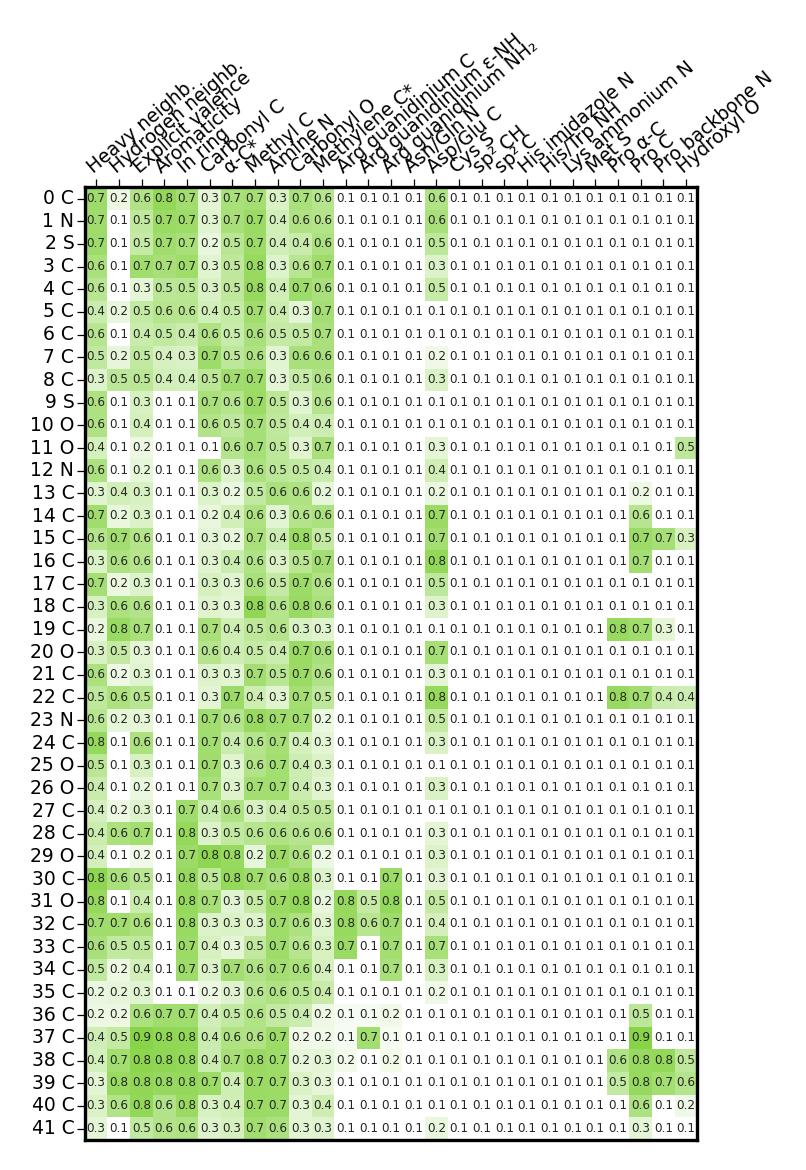

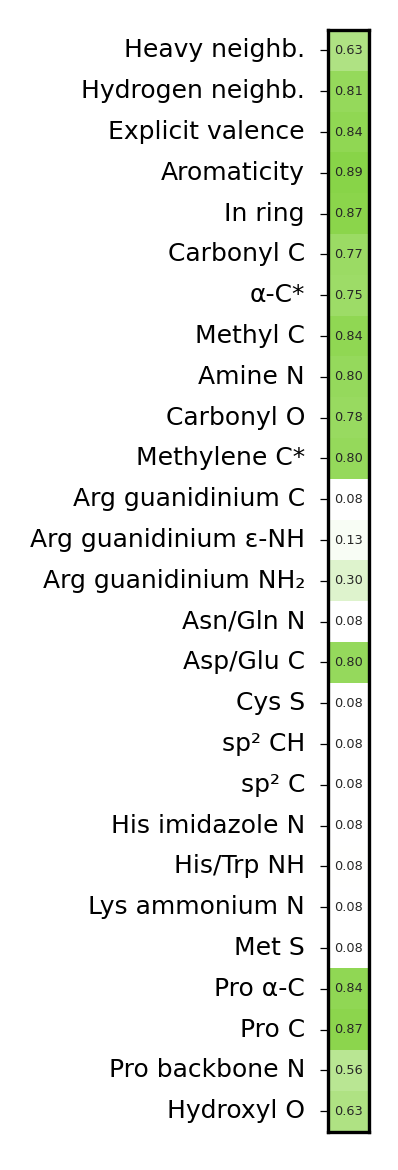

In [2]:
pdb_id="3o9i"
show_all(f"{pdb_id}_100_explanations", f"/nfs/home/s_homb04/Projektmodul/Graph_MLPNet_All/data/PDBBind/refined2016_2020_combined_for_ML_noligexpo/{pdb_id}/{pdb_id}_ligand.mol2")

In [ ]:
si_ids = ["1nc1", "2qnq", "2wer", "2wtv", "2xii", 
          "3e93", "3u8k", "4f2w", "4j28", "4llx", "5a7b"]
for si_id in si_ids:
    pass



In [10]:
pdb_id = "3o9i"
save_all(pdb_id, f"{pdb_id}_100_explanations", f"/nfs/home/s_homb04/Projektmodul/Graph_MLPNet_All/data/PDBBind/refined2016_2020_combined_for_ML_noligexpo/{pdb_id}/{pdb_id}_ligand.mol2", "SI_Images/")